<a href="https://colab.research.google.com/github/luccidx/Maleria_Detection-/blob/main/Maleria_detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2020-10-02 06:19:50--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  16.1MB/s    in 23s     

2020-10-02 06:20:13 (15.0 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



In [ ]:
ls

cell_images.zip  sample_data/


In [ ]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [ ]:
ls

cell_images/  cell_images.zip  sample_data/


In [ ]:
Parasitized_dir = "./cell_images/Parasitized"
Uninfected_dir = "./cell_images/Uninfected"

In [ ]:
import os

In [ ]:
len(os.listdir(Parasitized_dir))

13780

In [ ]:
len(os.listdir(Uninfected_dir))

13780

In [ ]:
Parasitized_images = os.listdir(Parasitized_dir)
Parasitized_images

['C144P105ThinF_IMG_20151015_155149_cell_308.png',
 'C46P7ThinF_IMG_20151130_210843_cell_138.png',
 'C93P54ThinF_IMG_20150821_163640_cell_202.png',
 'C60P21thinF_IMG_20150804_113011_cell_11.png',
 'C99P60ThinF_IMG_20150918_141129_cell_152.png',
 'C39P4thinF_original_IMG_20150622_114609_cell_14.png',
 'C132P93ThinF_IMG_20151004_151941_cell_48.png',
 'C175P136NThinF_IMG_20151127_141325_cell_220.png',
 'C68P29N_ThinF_IMG_20150819_133236_cell_181.png',
 'C182P143NThinF_IMG_20151201_171836_cell_172.png',
 'C168P129ThinF_IMG_20151118_161940_cell_161.png',
 'C137P98ThinF_IMG_20151005_163946_cell_17.png',
 'C176P137NThinF_IMG_20151201_121808_cell_126.png',
 'C116P77ThinF_IMG_20150930_171739_cell_77.png',
 'C180P141NThinF_IMG_20151201_164714_cell_184.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_157.png',
 'C91P52ThinF_IMG_20150821_125423_cell_13.png',
 'C126P87ThinF_IMG_20151004_105100_cell_132.png',
 'C117P78ThinF_IMG_20150930_215322_cell_87.png',
 'C39P4thinF_original_IMG_20150622_114804_ce

In [ ]:
from PIL import Image

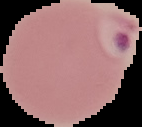

In [ ]:
Image.open(Parasitized_dir + "/C123P84ThinF_IMG_20151002_150931_cell_200.png")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "./cell_images"
data_gen = ImageDataGenerator(1/255.0)

In [ ]:
train_generator = data_gen.flow_from_directory(train_dir, target_size=(150, 150), class_mode="categorical" )

Found 27558 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation="relu", input_shape = (150, 150, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, activation="relu"))
#output layer
model.add(Dense(2, activation="softmax"))
model.compile(loss = "categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


In [ ]:
H = model.fit(train_generator, epochs=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
862/862 [==============================] - 34s 40ms/step - loss: 1.4469 - accuracy: 0.7922
Epoch 2/20
862/862 [==============================] - 34s 39ms/step - loss: 0.2681 - accuracy: 0.9151
Epoch 3/20
862/862 [==============================] - 34s 39ms/step - loss: 0.2624 - accuracy: 0.9192
Epoch 4/20
862/862 [==============================] - 34s 39ms/step - loss: 0.2670 - accuracy: 0.9197
Epoch 5/20
862/862 [==============================] - 34s 39ms/step - loss: 0.2541 - accuracy: 0.9206
Epoch 6/20
862/862 [==============================] - 34s 39ms/step - loss: 0.2484 - accuracy: 0.9227
Epoch 7/20
862/862 [==============================] - 34s 39ms/step - loss: 0.2405 - accuracy: 0.9242
Epoch 8/20
862/862 [==============================] - 34s 39ms/step - loss: 0.2394 - accuracy: 0.9246
Epoch 9/20
862/862 [==============================] - 34s 40ms/step - loss: 0.2405 - accuracy: 0.9256
Epoch 10/20
862/862 [==============================] - 34s 40ms/step - loss: 0.264

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving maleria-infected-cell.png to maleria-infected-cell (2).png


{'maleria-infected-cell.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xfe\x00\x00\x00\xfc\x08\x06\x00\x00\x00W^\x19Z\x00\x00\x1b\x99IDATx\xda\xec\x9d\r\xb0]Uu\xc7\xff\xe7\x9c{\xef\xfbJ\xc8\x17!\xc4\x84\x92\xd0\xa2\x8cU\x94\x0e\xa2\x8e\xaduPFJU\x18K\xad\x8a5t\x90P\xc5VG\x1d>\xea\'cu\xc0q,h\xa7\xda(Lc\x8b\x08TZ2\xf1\x83A\xc4R\x9c\x0eB\x0c\xa4\x10\r\x84X0!!\x84\x90\x90\xbc\xbc\xf7\xee=\x1f\x9d\x0b;\xf8\xf6\xda+w\xefw\xb8\xc9;\xf7\xbe\xffo\xe6\xce\xcb>9\xe7\xdc}\xf7\xbd\xeb\xec\xf3_g\xed\xb5b\x10Bf\x1c4|Bh\xf8\x84\x10\x1a>!\x84\x86O\x08\xa1\xe1\x13Bh\xf8\x84\x10\x1a>!\x84\x86O\x08\xe9\x1f\xc3?\x13\xc0&\x00\x9b\x01\\\xc6\xe1$\xa47\x88^\xc4\xb1\t\x80\x87\x01\x9c\x01`+\x80{\x01\xbc\x07\xc0\xc6\x0e\xc7\x14\x1crB\xa6\xdf\xae_\xcc\x8c\x7f\x9a\x99\xe9\xb7\x00h\x02\xf8.\x80\xb39\xe6\x84\xf4\xf7\xad\xfe\x12\x00\xbf\x99\xd4\xdej\xb6\x11B*N\xed\x08\xbc\xc7J\xf3"\x84\xf4\x81\xe1o\x03p\xdc\xa4\xf6R\xb3M\xb2\xca\xbc\xa8\xf1\xbb\xc8\xa7V\x9cg\xb5\x17\x1c5\xdb/\xfc\xa2(`\x9f\xce\xff_(\xff\xff\xd

In [ ]:
image = load_img("maleria-infected-cell.png", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis = 0)

In [ ]:
model.predict_classes(image)

array([0])

In [ ]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
files.upload()

Saving Uninfected-maleria-cell.png to Uninfected-maleria-cell (2).png


{'Uninfected-maleria-cell.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb4\x00\x00\x01\xb6\x08\x02\x00\x00\x00\x98\x9e\xe4\x1a\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x00!tEXtCreation Time\x002020:10:02 12:22:13\xf7\x0b\xf1i\x00\x00CtIDATx^\xed\x9d{\x8f\xad\xc9U\x9f{\xef\xdd\xe7\xcc\xc7H"\xa1D\x01\x0cx<\xbeF\xe4\x9f\x08)Q"\x08\xe6\xe6\xf1e\xc6\x9e\x8b-\xe5\x03%\xf823\xe6\x92\x04\x0c\x18\x0c\xc1\x12$\\\x12\xd9\x10\xe5\x8fH`\x03N A\x82\x04\xf2\x11<\xdd\xfb\x92\xea\xae\xaa\xa7\xd6\xde\xbf\xd55\xbb\xbb\xcfx\xbaO\xff\x1emi\xafS\xb5j\xd5\xaa\xaa\xf7\xd4\xee\xb5T\xef\xfb.v\xbb\xdd\x891\xc6\x98}\x96\xed\xdb\x18cL\xc0\x9b\xa31\xc6$xs4\xc6\x98\x04o\x8e\xc6\x18\x93\xe0\xcd\xd1\x18c\x12\xbc9\x1acL\x827Gc\x8cI\xf0\xe6h\x8c1\t\xde\x1c\x8d1&\xc1\x9b\xa31\xc6$\xdc\xdd\xdb\x07\x17\x8bE\x93\x8c9\x8e\xbf\xf8\xea\xcfTa\xb9l\xbf\xfa\\\xde\x08\\W\xf1\xca\xd7Z,\xc0v\xbb\xad\x02\

In [ ]:
image = load_img("Uninfected-maleria-cell.png", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis = 0)

In [ ]:
model.predict_classes(image)

array([1])

In [ ]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}